## Heart Attack Analysis & Prediction

### 1. Data Analysis
1.1 Basic information
1.2 Types analysis
1.3 Chcecking missing values
1.4 Data balancing

(303, 14)
Column names:
 ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
types:
 age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64

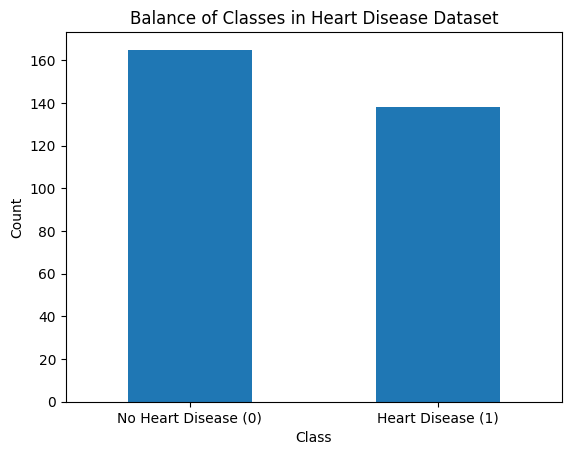

In [141]:
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('heart.csv')
print(df.shape)
# Nazwy kolumn
print(f'Column names:\n {df.columns.tolist()}')
# Wyświetlenie pierwszych kilku wierszy, aby sprawdzić, czy dane zostały poprawnie wczytane
print(df.head())

# Typy danych kolumn
print(f'types:\n {df.dtypes}')

# Liczba brakujących wartości na kolumnę
print(f'null occurrences:\n, {df.isnull().sum()}')

class_counts = df['output'].value_counts()
# Tworzenie wykresu słupkowego dla balansu danych
class_counts.plot(kind='bar')
plt.title('Balance of Classes in Heart Disease Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease (0)', 'Heart Disease (1)'], rotation=0)
plt.show()


Conclusion 1: There aren't any missing values.
Conclusion 2: It can be seen that the number of cases for both classes (presence of heart disease (1) and absence of heart disease (0)) is comparable, suggesting relatively good balance of the data. This balance between classes is desirable in data analysis and predictive modeling because it helps prevent the model from being biased towards the dominant class.

### Attributes definitions
age - Age of the person (age in years)
sex - Gender of the person (1 = male; 0 = female)
cp - Chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

trtbps - Resting blood pressure (in mm Hg)
chol - Cholesterol in mg/dl fetched via BMI sensor
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg - Resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalachh - Maximum heart rate achieved
exng - Exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest

1.5 Exploratory Data Analysis:


Descriptive statistics
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std 

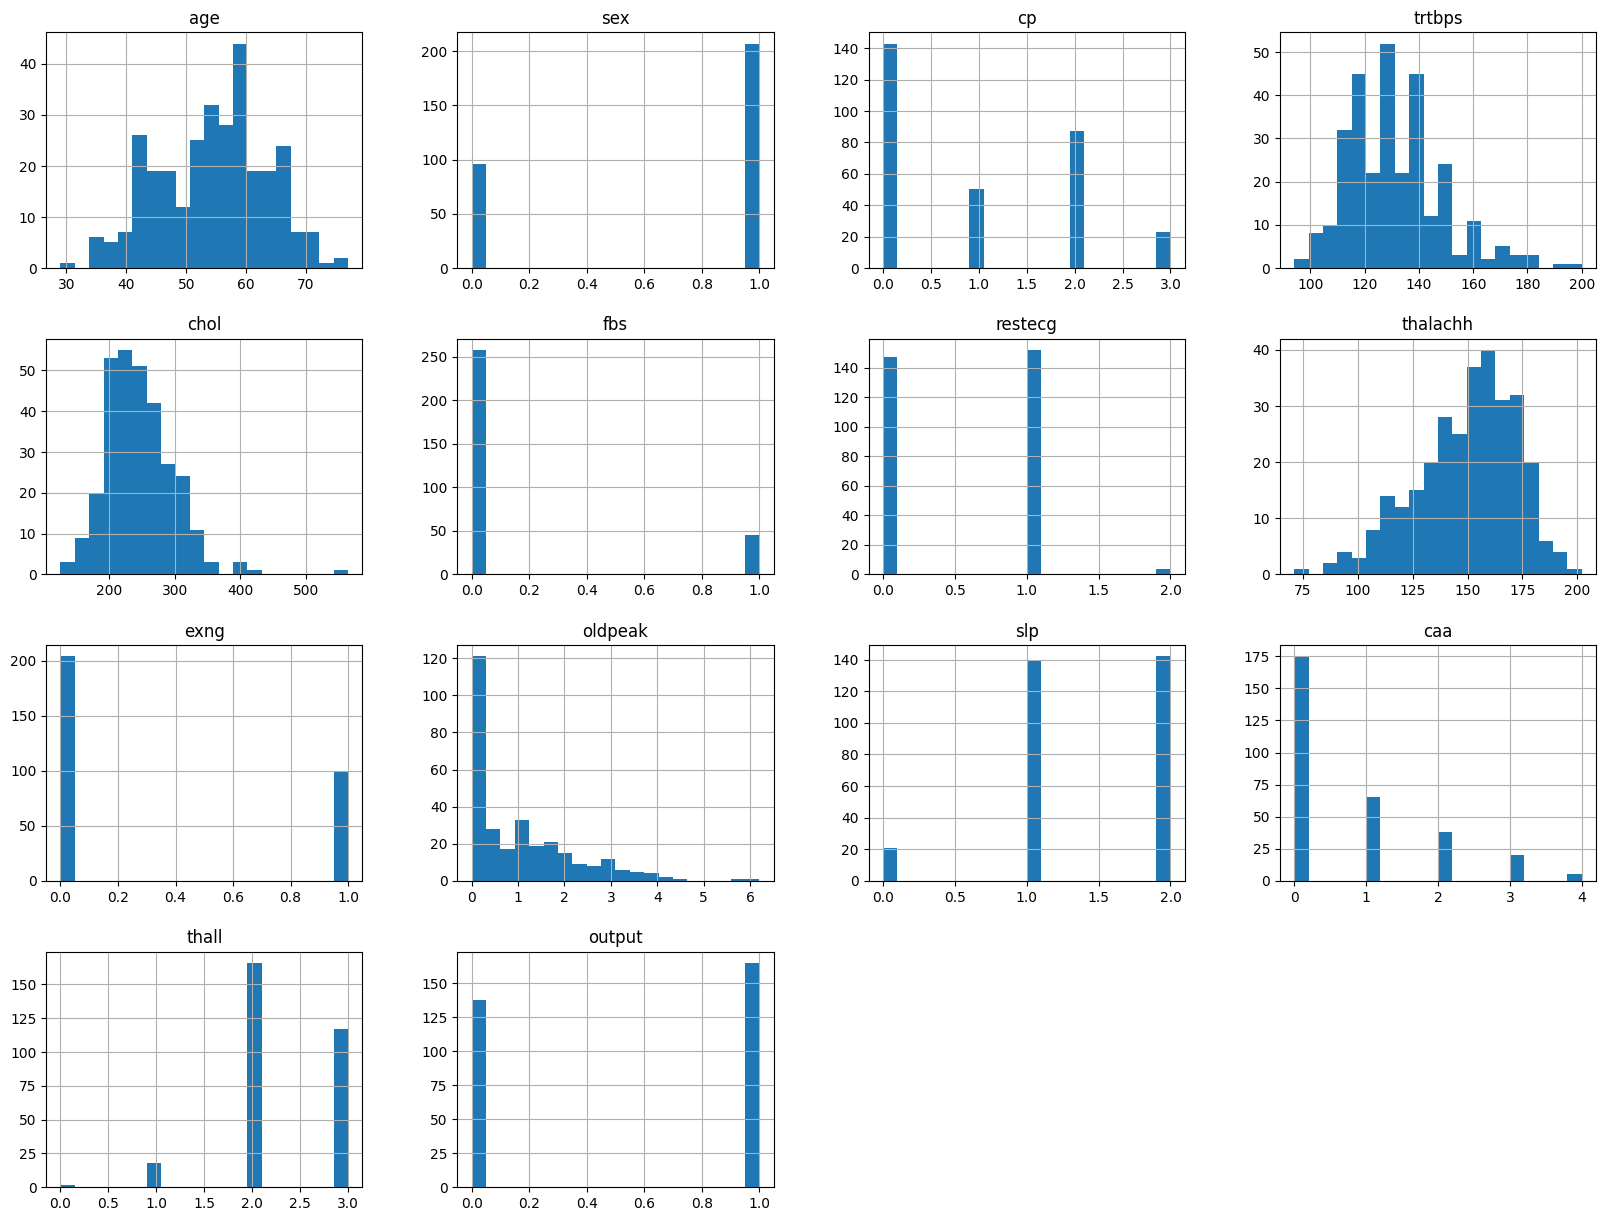

Bar charts for categorical data


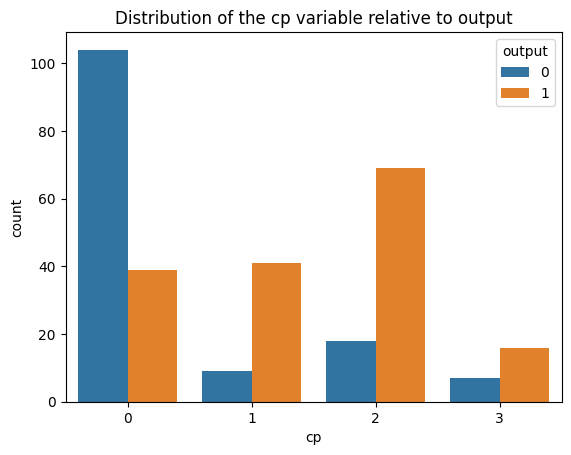

/Users/oliwia/PycharmProjects/PythonProjects/Heart_attack_prediction/.venv/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [142]:
print('Descriptive statistics')
print(df.describe())
print('Histograms for numerical data')
df.hist(bins=20, figsize=(20, 15))
plt.show()

print('Bar charts for categorical data')
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

# Example for categorical variable 'cp' and target variable 'output'
sns.countplot(x='cp', hue='output', data=df)
plt.title('Distribution of the cp variable relative to output')
plt.show()

fig=px.histogram(df, 
                 x="output",
                 color="sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()



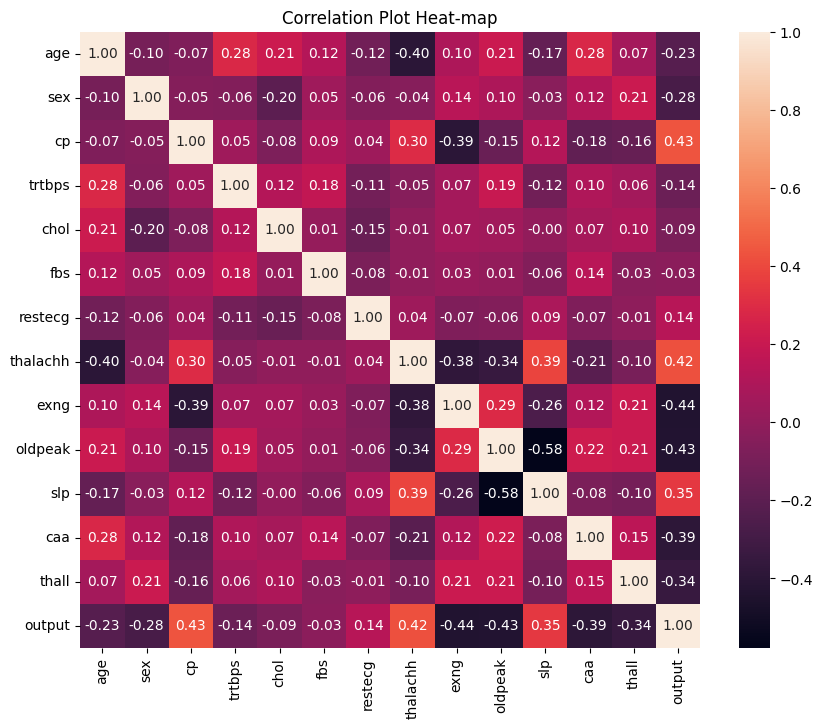

In [143]:
corr = df.corr()

# Tworzenie mapy cieplnej z adnotacjami
plt.figure(figsize=(10, 8)) # Możesz dostosować rozmiar dla lepszej czytelności
sns.heatmap(corr, annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Plot Heat-map")
plt.show()

Conclusion: In relation to the target variable 'output', the 'cp', 'thalachh' and 'slp' attributes have the highest correlation

1.6 Which Scaler we're going to use?

In [144]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Określenie, które wartości w DataFrame są outlierami
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Liczba outlierów w każdej kolumnie
outliers_count = outliers.sum()
print("Liczba outlierów w każdej kolumnie:")
print(outliers_count)


Liczba outlierów w każdej kolumnie:
age          0
sex          0
cp           0
trtbps       9
chol         5
fbs         45
restecg      0
thalachh     1
exng         0
oldpeak      5
slp          0
caa         25
thall        2
output       0
dtype: int64


Due to columns such as 'trtbps', 'chol', 'fbs', 'oldpeak', 'caa', 'thall' which have outlier values, we will use RobustScaler for standardization, which handles such values well.
Scales data using statistics that are resistant to outliers (median and interquartile range).

In [145]:
print("After RobustScaler normalization:\n")
columns_to_scale = df.columns.drop('output')
# Inicjalizacja RobustScaler
scaler = RobustScaler()
# Skalowanie wybranych kolumn
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
print(df.head())

After RobustScaler normalization:

        age  sex   cp  trtbps      chol  fbs  restecg  thalachh  exng  \
0  0.592593  0.0  1.0    0.75 -0.110236  1.0     -1.0 -0.092308   0.0   
1 -1.333333  0.0  0.5    0.00  0.157480  0.0      0.0  1.046154   0.0   
2 -1.037037 -1.0  0.0    0.00 -0.566929  0.0     -1.0  0.584615   0.0   
3  0.074074  0.0  0.0   -0.50 -0.062992  0.0      0.0  0.769231   0.0   
4  0.148148 -1.0 -0.5   -0.50  1.795276  0.0      0.0  0.307692   1.0   

   oldpeak  slp  caa  thall  output  
0   0.9375 -1.0  0.0   -1.0       1  
1   1.6875 -1.0  0.0    0.0       1  
2   0.3750  1.0  0.0    0.0       1  
3   0.0000  1.0  0.0    0.0       1  
4  -0.1250  1.0  0.0    0.0       1  


### 2. Finding the best evaluation model
#### 2.1 K-NN

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Najlepsze parametry: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


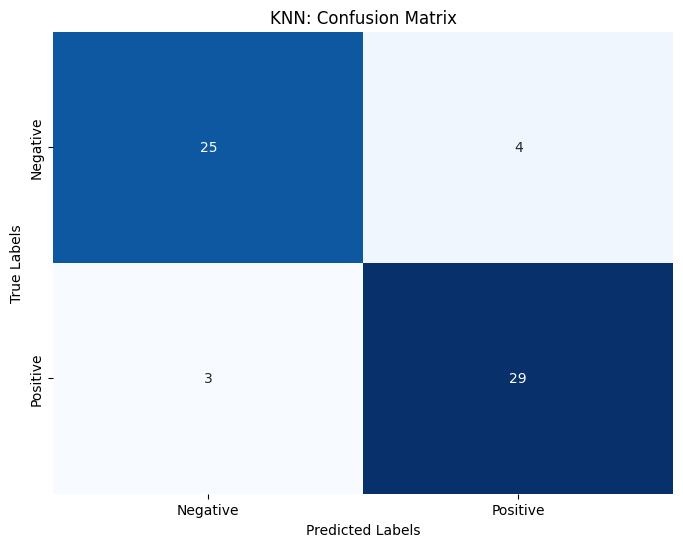

In [146]:
X = df.drop('output', axis=1)
y = df['output']

# Podział na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definiowanie klasyfikatora KNN
knn = KNeighborsClassifier()

# Siatka parametrów do przeszukania
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Użycie GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Trenowanie modelu
grid_search.fit(X_train, y_train)

# Wyświetlenie najlepszych parametrów
print(f'Najlepsze parametry: {grid_search.best_params_}')

# Predykcja na zestawie testowym z najlepszym zestawem parametrów
y_pred = grid_search.predict(X_test)

# Ocena modelu
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
# Rysowanie confusion matrix
plt.figure(figsize=(8, 6))  # Możesz dostosować rozmiar dla lepszej czytelności
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('KNN: Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### 2.2 Logistic Regression 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


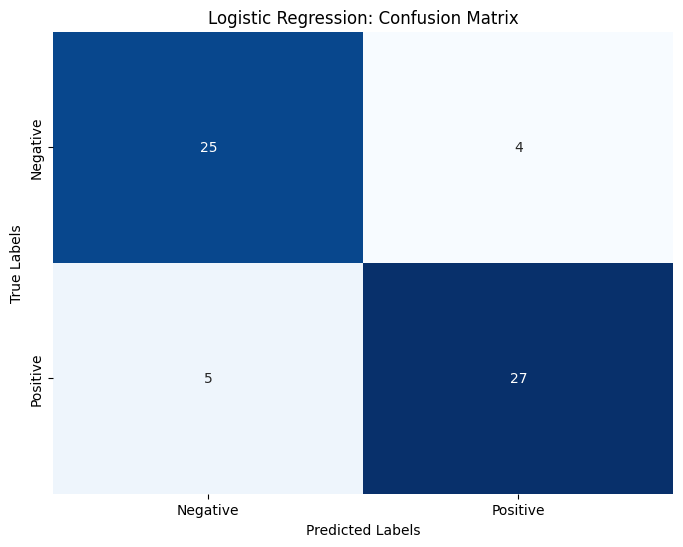

In [147]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Ocena modelu
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
# Rysowanie confusion matrix
plt.figure(figsize=(8, 6))  # Możesz dostosować rozmiar dla lepszej czytelności
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Logistic Regression: Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### SVM

SVM: Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


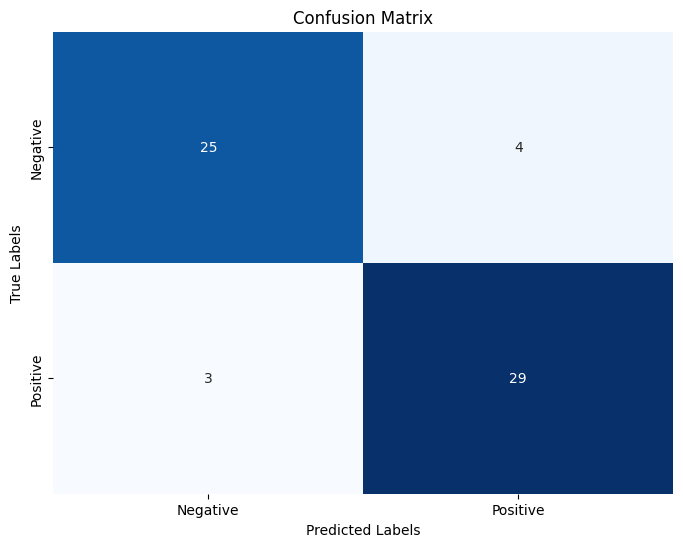

In [148]:
svm_model = SVC(kernel='poly')  # Możesz zmienić jądro na 'rbf', 'poly' itd.
svm_model.fit(X_train, y_train)
# Dokonujemy predykcji na zestawie testowym
y_pred = svm_model.predict(X_test)

# Ocena modelu
print("SVM: Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
# Rysowanie confusion matrix
plt.figure(figsize=(8, 6))  # Możesz dostosować rozmiar dla lepszej czytelności
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### DecisionTree & RandomForest


In [149]:
param_grid = {
    'n_estimators': [100, 200],  # Liczba drzew
    'max_features': ['sqrt'],  # Liczba cech rozważanych przy każdym podziale
    'max_depth': [5, 10],  # Maksymalna głębokość drzewa
    'min_samples_split': [2, 5, 10],  # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2, 4],  # Minimalna liczba próbek wymagana w liściu
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           verbose=2, 
                           n_jobs=-1)  # Ile procesów równocześnie; -1 oznacza użycie wszystkich procesorów

# Trenowanie modelu z GridSearchCV
grid_search.fit(X_train, y_train)

# Wyświetlenie najlepszych parametrów
print("Najlepsze parametry:", grid_search.best_params_)

# Użycie najlepszego modelu do predykcji na zestawie testowym
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Ocena modelu
print("Random Forest z najlepszymi parametrami - Raport klasyfikacji:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Najlepsze parametry: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest z najlepszymi parametrami - Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


In [150]:
# Inicjalizacja i trenowanie modelu XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
# Dokonujemy predykcji na zestawie testowym
y_pred = xgb_model.predict(X_test)

# Ocena modelu
print("XGBoost - Raport klasyfikacji:")
print(classification_report(y_test, y_pred))
# Definicja siatki hiperparametrów
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

# Inicjalizacja GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                           param_grid=param_grid, 
                           cv=3, 
                           verbose=2, 
                           n_jobs=-1)

# Trenowanie modelu z GridSearchCV
grid_search.fit(X_train, y_train)

# Wyświetlenie najlepszych parametrów
print("Najlepsze parametry:", grid_search.best_params_)

# Użycie najlepszego modelu do predykcji na zestawie testowym
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Ocena najlepszego modelu
print("XGBoost z najlepszymi parametrami - Raport klasyfikacji:")
print(classification_report(y_test, y_pred_best))

XGBoost - Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Najlepsze parametry: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1}
XGBoost z najlepszymi parametrami - Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


In [170]:
from keras.src.optimizers import Adam
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(64, activation='selu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='selu'))
model.add(Dense(1, activation='sigmoid'))  # Użycie sigmoid na warstwie wyjściowej dla klasyfikacji binarnej

# Kompilacja modelu
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Trenowanie modelu
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Ocena modelu na zestawie testowym
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/20
7/7 [==============================] - 0s 13ms/step - loss: 0.7698 - accuracy: 0.5078 - val_loss: 0.5219 - val_accuracy: 0.8163
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 0.5558 - accuracy: 0.7150 - val_loss: 0.4540 - val_accuracy: 0.8367
Epoch 3/20
7/7 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.8083 - val_loss: 0.4308 - val_accuracy: 0.8163
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.8187 - val_loss: 0.4271 - val_accuracy: 0.7959
Epoch 5/20
7/7 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.8238 - val_loss: 0.4453 - val_accuracy: 0.7551
Epoch 6/20
7/7 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 0.8238 - val_loss: 0.4475 - val_accuracy: 0.7347
Epoch 7/20
7/7 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8238 - val_loss: 0.4376 - val_accuracy: 0.7551
Epoch 8/20
7/7 [=================